PREWITT

Nisaa' Husnia Yahya - 2213020099/3A

In [2]:
#Import Library
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import math

In [3]:
# Buka gambar dan ubah ke RGB
img = Image.open('kucing.jpeg')
img = img.convert('RGB')
width, height = img.size

# Ubah ke array numpy
rgb = np.array(img)
rgb

array([[[ 90, 111,  96],
        [ 91, 112,  97],
        [ 69,  85,  75],
        ...,
        [ 44,  69,  63],
        [ 41,  71,  61],
        [ 62,  95,  84]],

       [[ 93, 113, 101],
        [ 88, 108,  96],
        [ 63,  79,  69],
        ...,
        [ 69,  92,  84],
        [ 58,  88,  78],
        [ 68, 101,  90]],

       [[ 91, 111, 100],
        [ 78,  98,  89],
        [ 52,  67,  60],
        ...,
        [ 88, 111, 101],
        [ 91, 121, 109],
        [108, 140, 127]],

       ...,

       [[ 27,  33,  23],
        [ 29,  35,  23],
        [ 34,  40,  26],
        ...,
        [189, 168, 151],
        [206, 185, 168],
        [200, 179, 162]],

       [[ 27,  33,  21],
        [ 32,  38,  24],
        [ 43,  50,  34],
        ...,
        [182, 161, 144],
        [209, 188, 171],
        [203, 182, 165]],

       [[ 24,  30,  16],
        [ 34,  41,  25],
        [ 53,  60,  44],
        ...,
        [204, 183, 166],
        [209, 188, 171],
        [196, 175, 158]]

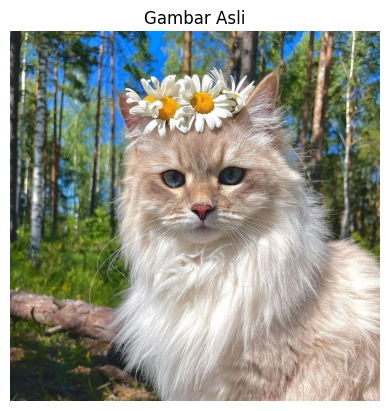

In [4]:
# Tampilkan gambar asli
plt.imshow(rgb)
plt.axis('off')
plt.title('Gambar Asli')
plt.show()

In [5]:
# Konversi manual RGB ke Grayscale
def convert_to_grayscale(pixel):
    r, g, b = pixel
    gray = int(0.299 * r + 0.587 * g + 0.114 * b)
    return gray

grayscale_img = []
for y in range(height):
    row = []
    for x in range(width):
        pixel = rgb[y, x]
        gray = convert_to_grayscale(pixel)
        row.append(gray)
    grayscale_img.append(row)

grayscale_img = np.array(grayscale_img)
grayscale_img

array([[103, 104,  79, ...,  60,  60,  83],
       [105, 100,  73, ...,  84,  77,  89],
       [103,  90,  61, ..., 102, 110, 128],
       ...,
       [ 30,  31,  36, ..., 172, 189, 183],
       [ 29,  34,  46, ..., 165, 192, 186],
       [ 26,  37,  56, ..., 187, 192, 179]])

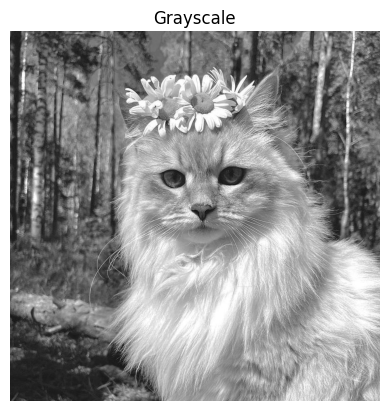

In [6]:
# Tampilkan gambar grayscale
plt.imshow(grayscale_img, cmap='gray')
plt.axis('off')
plt.title('Grayscale')
plt.show()

In [7]:
# Kernel Prewitt
Gx = [[-1, 0, 1],
      [-1, 0, 1],
      [-1, 0, 1]]

Gy = [[-1, -1, -1],
      [ 0,  0,  0],
      [ 1,  1,  1]]


In [8]:
# Operasi Prewitt manual
def apply_prewitt_operator(img):
    gradient_magnitude = np.zeros((height, width), dtype=np.uint8)

    for y in range(1, height - 1):
        for x in range(1, width - 1):
            gx = 0
            gy = 0
            for i in range(3):
                for j in range(3):
                    pixel = img[y + i - 1, x + j - 1]
                    gx += Gx[i][j] * pixel
                    gy += Gy[i][j] * pixel
            magnitude = math.sqrt(gx**2 + gy**2)
            gradient_magnitude[y, x] = min(int(magnitude), 255)

    return gradient_magnitude

edges = apply_prewitt_operator(grayscale_img)
edges = np.array(edges)
edges

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0, 103, 169, ..., 125, 147,   0],
       [  0, 133, 160, ..., 120, 151,   0],
       ...,
       [  0,  33,  70, ...,  52,  25,   0],
       [  0,  57, 104, ...,  49,  27,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

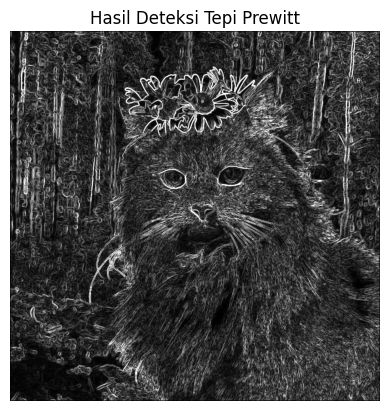

In [9]:
plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.title('Hasil Deteksi Tepi Prewitt')
plt.show()